## Modelo utilizando RNN

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
result = pyreadr.read_r('dbLimpios.rds') # also works for RData

df = result[None] # extract the pandas data frame 

In [3]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_TYPE,Label,Attack
0,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,1024,0,0,0,0,0,Benign
1,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,1024,0,0,0,0,0,Benign
2,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,1024,0,0,0,0,0,Benign
3,172.31.66.53,51860,77.93.254.178,443,6,91.0,152,3,120,3,...,0,0,0,8192,0,0,0,0,0,Benign
4,192.168.1.32,56402,192.168.1.169,9012,6,0.0,232,4,132,3,...,0,0,0,29200,65535,0,0,0,0,Benign


In [4]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE', 'ICMP_IPV4_TYPE',
       'DNS_QUERY_TYPE', 'Label', 'Attack'],
      dtype='object')

<AxesSubplot:xlabel='Label', ylabel='count'>

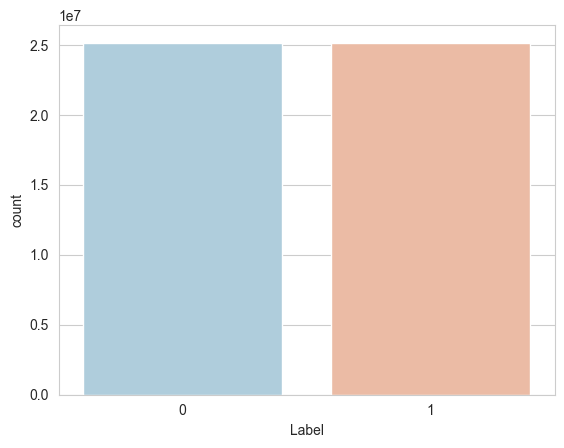

In [5]:
# group by Label and graph the sum to see the distribution of the data using seaborn.

sns.set_style('whitegrid')
sns.countplot(x='Label', data=df, palette='RdBu_r')

In [6]:
new_df = df[["DST_TO_SRC_SECOND_BYTES","SHORTEST_FLOW_PKT","MAX_TTL","PROTOCOL","L7_PROTO","FLOW_DURATION_MILLISECONDS","DURATION_IN","DURATION_OUT","MIN_TTL","Label"]]
new_df.head()

,DST_TO_SRC_SECOND_BYTES,SHORTEST_FLOW_PKT,MAX_TTL,PROTOCOL,L7_PROTO,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,Label
0,40.0,40,0,6,0.0,0,0,0,0,0
1,40.0,40,0,6,0.0,0,0,0,0,0
2,40.0,40,0,6,0.0,0,0,0,0,0
3,120.0,40,128,6,91.0,0,0,0,128,0
4,132.0,40,64,6,0.0,0,0,0,64,0


In [7]:
new_df.shape

(50330590, 10)

In [8]:
# delete repeated rows
# new_df = new_df.drop_duplicates()

In [9]:
new_df.shape

(50330590, 10)

In [10]:
# shuffle the data
new_df = new_df.sample(frac=1)

In [11]:
x = new_df.drop('Label', axis=1)
y = new_df['Label']

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\utils\extmath.py:1014: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\preprocessing\_data.py:80: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [14]:
# delete nan values
x = np.nan_to_num(x)
x

array([[ 0.        , -0.19609873,  0.23270543, ..., -0.1533398 ,
         2.31051114,  0.23495643],
       [ 0.        , -0.47624382,  1.708017  , ..., -0.51222618,
        -0.11474423,  1.71211107],
       [ 0.        , -0.47624382,  0.25540253, ...,  0.10592688,
        -0.11474423,  0.25768189],
       ...,
       [ 0.        , -0.47624382,  1.20868078, ..., -0.51222618,
        -0.11474423,  1.21215104],
       [ 0.        , -0.38286212, -1.19721194, ..., -0.51222618,
        -0.11474423, -1.1967473 ],
       [ 0.        ,  0.27080976, -1.19721194, ..., -0.51222618,
        -0.11474423, -1.1967473 ]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
# import Adams
from tensorflow.keras.optimizers import Adam
model.compile(  optimizer=Adam(lr=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
275246/275246 [==============================] - 329s 1ms/step - loss: 0.1507 - accuracy: 0.9335 - precision: 0.9647 - recall: 0.8998
Epoch 2/5
275246/275246 [==============================] - 320s 1ms/step - loss: 0.1298 - accuracy: 0.9405 - precision: 0.9662 - recall: 0.9128
Epoch 3/5
275246/275246 [==============================] - 319s 1ms/step - loss: 0.1257 - accuracy: 0.9428 - precision: 0.9652 - recall: 0.9188
Epoch 4/5
275246/275246 [==============================] - 322s 1ms/step - loss: 0.1214 - accuracy: 0.9446 - precision: 0.9680 - recall: 0.9196
Epoch 5/5
275246/275246 [==============================] - 327s 1ms/step - loss: 0.1183 - accuracy: 0.9456 - precision: 0.9698 - recall: 0.9199


In [23]:
result = model.evaluate(X_test, y_test)
print('Test:', result)

471850/471850 [==============================] - 372s 788us/step - loss: 0.1173 - accuracy: 0.9455 - precision: 0.9753 - recall: 0.9142
Test: [0.11725758016109467, 0.9455359578132629, 0.9753191471099854, 0.9142040014266968]


In [20]:
a = np.array([[167.0, 68, 0, 17, 0.0, 0, 0, 0, 0],
              [231.0, 40, 100, 6, 0.0, 0, 0, 0, 100], 
              [71.0, 71, 0, 17, 0.0, 0, 0, 0, 0],
              [0.0, 140, 64, 6, 7.0, 4293686, 1281, 0, 64]])

model.predict(a)

1/1 [==============================] - 0s 93ms/step


array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)